<a href="https://colab.research.google.com/github/AlejRamos/Aprendiendo-Pandas/blob/main/Data_Frame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
"""url = https://pandas.pydata.org/pandas-docs/dev/user_guide/dsintro.html"""

'url = https://pandas.pydata.org/pandas-docs/dev/user_guide/dsintro.html'

In [ ]:
"""
Data Frame
De diccionario de series o dicccionarios
El índice resultante será la unión de los índices de las diversas series. 
Si hay algún dict anidado, estos se convertirán primero en series. 
Si no se pasan columnas, las columnas serán la lista ordenada de las claves dict.
"""

d={"columna 1":pd.Series([1.0,2.0,3.0],index=["a","b","c"]), 
   "columna 2":pd.Series([1.0,2.0,3.0,4.0], index=["a","b","c","d"])}

df = pd.DataFrame(d)
df


,columna 1,columna 2
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [ ]:
"""
Modificando Data Frame
"""

df1 = pd.DataFrame(d, index=["d", "a", "c"]) #Escribe las columnas establecidas y las etiquetas solicitadas en ese orden
print(df1)

df2 = pd.DataFrame(d, index=["d", "a", "c"],columns=["columna 2", "columna 3"]) 
#Escribe las filas y columnas establecidas, si no hay datos pone NaN
print(df2)

#Por supuesto se puede acceder a los datos por filas o columnas
print(df["c":"columna 2"])

#Podemos conocer el indice y las columnas
print(df.index)
print(df2.columns)

   columna 1  columna 2
d        NaN        4.0
a        1.0        1.0
c        3.0        3.0
   columna 2 columna 3
d        4.0       NaN
a        1.0       NaN
c        3.0       NaN
   columna 1  columna 2
c        3.0        3.0
Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['columna 2', 'columna 3'], dtype='object')


In [ ]:
"""
De diccionarios de ndarrays y listas
recordar que un ndarray no es necesariamente un ente de numpy
"""

df_arrays = {"uno":[23,22,24,21],"dos":[19.0,8.0,24.0,30.0]}
print(pd.DataFrame(df_arrays))

#Asi mismo podemos colocarle etiquetas
print(pd.DataFrame(df_arrays,index=["Alex","Tere","Lo","Fer"]))

   uno   dos
0   23  19.0
1   22   8.0
2   24  24.0
3   21  30.0
      uno   dos
Alex   23  19.0
Tere   22   8.0
Lo     24  24.0
Fer    21  30.0


In [ ]:
"""
From structured or record array
"""

data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]

print(pd.DataFrame(data))

#como ya vimos, podemos agregarle un índice
print(pd.DataFrame(data, index=["Primero", "Segundo"]))

#Más aún, podemos configurar el orden de las columnas
print(pd.DataFrame(data, index=["Primero","Segundo"], columns=["C","A","B"]))

   A    B         C
0  1  2.0  b'Hello'
1  2  3.0  b'World'
         A    B         C
Primero  1  2.0  b'Hello'
Segundo  2  3.0  b'World'
                C  A    B
Primero  b'Hello'  1  2.0
Segundo  b'World'  2  3.0


In [ ]:
"""
De una lista de dicccionarios
Vimos que se puede crear a partir de un dictado una Series, sin embargo
con varios dicccionarios podemos crear un DataFrame, donde cada dictado será
una fila. Si los dict no son del mismo tamaño, se tomará el de mayor
orden para definir el número de columnas, los demás rellenarán con NaN
"""

dictados = [{"a":23, "T":23},{"a":19,"T":8,"A":26}]

print(pd.DataFrame(dictados))

#Y el resto, nombrar índices y ajustar columnas igual que en los casos anteriores


    a   T     A
0  23  23   NaN
1  19   8  26.0


In [ ]:
"""
De un dict de Tuplas
Se puede crear automaticamente una marco multi-indexado
"""
#Notemos que, la primer letra denota un indice superior de columnas, mientras
#que la segunda una columna secudaria, lo mismo con las filas

print(pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
))

#Si solo queremos columnas y filas procedemos como listas de dict
print(pd.DataFrame(
    {"a":{"A":1,"C":2},
     "b":{"A":3, "C":4}
     }
)
    
)


       a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0
   a  b
A  1  3
C  2  4


In [ ]:
"""
De Series
Ya sabemos hacer series, por lo que es evidente podemos hacer un DF
desde Series
"""

ser = pd.Series(np.random.randint(4,5), index=list("abcd"), name="ser")

print(pd.DataFrame(ser))


   ser
a    4
b    4
c    4
d    4


In [ ]:
"""
From a list of namedtuples

Los nombres de campo del primer namedtuple en la lista determinan las columnas
del DataFrame. Las demás namedtuples (o tuplas) son simplemente desempaquetadas
y sus valores se introducen en las filas del DataFrame. Si alguna de esas
tuplas es más corta que la primera namedtuple, entonces las columnas
posteriores en la fila correspondiente se marcan como valores que faltan. 
Si alguno es más largo que el primer nombre, se eleva un ValueError.
Los nombres de campo del primer namedtuple en la lista determinan las
columnas del DataFrame. Las demás namedtuples (o tuplas) son simplemente
desempaquetadas y sus valores se introducen en las filas del DataFrame. 
Si alguna de esas tuplas es más corta que la primera namedtuple, entonces
las columnas posteriores en la fila correspondiente se marcan como 
valores que faltan. Si alguno es más largo que el primer nombre, 
se eleva un ValueError.
"""

from collections import namedtuple

Puntos = namedtuple("Puntos", "x y")
print(pd.DataFrame([Puntos(0,0), Puntos(1,1), Puntos(2,2)]))

#Así mismo podemos aumentar el número de columnas
P4 = namedtuple("P4", "x y z a")

print(pd.DataFrame([P4(0,0,0,0), P4(1,2,3,4),P4(2,4,6,8)]))

   x  y
0  0  0
1  1  1
2  2  2
   x  y  z  a
0  0  0  0  0
1  1  2  3  4
2  2  4  6  8


In [ ]:
"""
De una dataclass
"""

from dataclasses import make_dataclass

Point = make_dataclass("Point", [("x", int), ("y", int)])

print(pd.DataFrame([Point(0,0), Point(1,1)]))

   x  y
0  0  0
1  1  1


In [ ]:
"""
Construcciones alternas
"""
#DataFrame.from_dict
#De la siguiente forma 
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

#De la siguiente forma asignamos columnas y filas, usando el comando orient
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
                       orient="index", columns=["uno","dos","tres"])


,uno,dos,tres
A,1,2,3
B,4,5,6


In [ ]:
"""
Trabajando con las columnas
"""

df_arrays

df3 = pd.DataFrame(df_arrays)

#Para seleccionar una columna, regresa una Series
df3["uno"]

#Podemos agregar una columna con operaciones entre columnas
df3["tres"] = df3["uno"]*df3["dos"]

#Incluso agregar más columnas con condicionales
df3["Objetivo"] = df3["uno"] > 22

print(df3)
print("")

#También se pueden borrar o "Poppear" columnas

del df3["dos"]

print(df3)
print("")

tres = df3.pop("tres")

print(df3)
print("")

#Al agregar una columna insertando un valor escalar, se llenará 
df3["Foo"] = 3.0
print(df3)
print("")

#Cuando se agregá una serie con diferente tamaño se rellena con NaN
df3["uno incompleto"] = df3["uno"][:2]
print(df3)
print("")

#Se pueden insertar columnas, con la condición que esta nueva tenga el mismo
#número de índices, la función insert nos ayuda a colocarla en cualquier 
#posición

df3.insert(2,"dos", df3["uno"])
print(df3)

   uno   dos   tres  Objetivo
0   23  19.0  437.0      True
1   22   8.0  176.0     False
2   24  24.0  576.0      True
3   21  30.0  630.0     False

   uno   tres  Objetivo
0   23  437.0      True
1   22  176.0     False
2   24  576.0      True
3   21  630.0     False

   uno  Objetivo
0   23      True
1   22     False
2   24      True
3   21     False

   uno  Objetivo  Foo
0   23      True  3.0
1   22     False  3.0
2   24      True  3.0
3   21     False  3.0

   uno  Objetivo  Foo  uno incompleto
0   23      True  3.0            23.0
1   22     False  3.0            22.0
2   24      True  3.0             NaN
3   21     False  3.0             NaN

   uno  Objetivo  dos  Foo  uno incompleto
0   23      True   23  3.0            23.0
1   22     False   22  3.0            22.0
2   24      True   24  3.0             NaN
3   21     False   21  3.0             NaN


,A,B,C,D
0,1.0,0.961043,0.961043,0.000000
1,2.0,0.438529,0.877057,0.438529
2,3.0,0.976773,2.930320,1.953547
3,4.0,0.677766,2.711064,2.033298


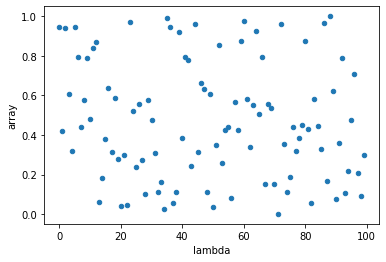

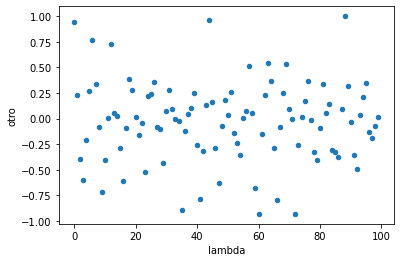

In [13]:
"""
Asignar nuevas columnas con el método de la cadena
"""

d_iris = {"lambda":pd.Series(range(100)),
                             "array":pd.Series(np.random.rand(100))}
iris = pd.DataFrame(d_iris)

iris.plot(kind="scatter", x="lambda", y="array")

#Se asgina una nueva columna
iris.assign(otro=np.cos(iris["lambda"])*iris["array"]) 

#Podemos también hacerlo con una funcion univaluada
iris.assign(otro=lambda x:(np.cos(x["lambda"])*x["array"])).head()

#Y para graficar es
iris.assign(otro=lambda x:(np.cos(x["lambda"])*x["array"])).plot(kind="scatter", x="lambda", y="otro")

#Podemos agregar columnas de las recien agregadas
Ar = pd.DataFrame({"A":[1.0,2.0,3.0,4.0], "B":np.random.rand(4)})
#Aquí la C es de la nueva columna generada
Ar.assign(C=lambda x: x["A"]*x["B"], D=lambda x: x["C"]-x["B"])

In [ ]:
"""
Indexing/Selection
Hay una serie de comandos basicos de indexing
"""

calle = {"A":pd.Series([1.0,2.0,3.5,4.8,9.4],index=["a","b","c","d","e"]),
         "B":pd.Series([7.5,1.2,0.98,8.9,7.3],index=["a","b","c","d","e"]),
         "C":pd.Series([2.0,6.0,8.54,3.9,4.0],index=["a","b","c","d","e"])}

ca = pd.DataFrame(calle)

#Seleccionar columna, devuelve una serie
print(ca["A"])

#Seleccionar un row por label, devuelve una serie
print(ca.loc["b"])

#Seleccionar una row por numeración, devuelve una serie
print(ca.iloc[3])

#Seleccionar rebanadas, devuelve un DataFrame
print(ca[2:4])

a    1.0
b    2.0
c    3.5
d    4.8
e    9.4
Name: A, dtype: float64
A    2.0
B    1.2
C    6.0
Name: b, dtype: float64
A    4.8
B    8.9
C    3.9
Name: d, dtype: float64
     A     B     C
c  3.5  0.98  8.54
d  4.8  8.90  3.90


In [3]:
"""
Alineación de datos y aritmetica
La alineación de datos de dataframe, alinea automaticamente los datos, dando
como resultado la unión de los datos.
"""

d_f_1 = pd.DataFrame(np.random.rand(10,4), columns=["A","B","C","D"])
d_f_2 = pd.DataFrame(np.random.rand(7,3), columns=["A","B","C"])

#En las líneas anteriores tenemos dos DF de distinta dimensión,
#al sumarlos, la alineación nos regresa la unión

print(d_f_1+d_f_2) #Notese que donde no se unen aparece NaN

"""
Cuando se realiza una operación entre DataFrame y Series, 
el comportamiento predeterminado es alinear el índice de Series en las
columnas DataFrame, transmitiendo así las filas. Por ejemplo:
"""

print(d_f_1-d_f_1.iloc[0])

#Operaciones por escalares

print(d_f_1*2-5) #Multiplica cada elemento por cinco y resta dos

print(1/d_f_1) #Saca el inverso de cada elemento

print(d_f_1**2) #Eleva a la cuarta cada elemento

#Operaciones con boleanos

d_f_3 = pd.DataFrame({"a":[1,0,0], "b":[0,1,1]}, dtype=bool)
d_f_4 = pd.DataFrame({"a":[1,1,0], "b":[0,1,0]}, dtype=bool)

print(d_f_3 & d_f_4) # Unión

print(d_f_3 | d_f_4) #Conjunción

print(d_f_3 ^ d_f_4) #

print(-d_f_3) #Negación

          A         B         C   D
0  1.496306  0.710080  1.132496 NaN
1  1.652609  0.262109  1.525614 NaN
2  1.252081  1.751045  1.065407 NaN
3  1.485655  1.311951  1.601565 NaN
4  0.971566  1.036643  0.687383 NaN
5  1.402386  0.939968  0.462149 NaN
6  1.028072  0.195016  0.724068 NaN
7       NaN       NaN       NaN NaN
8       NaN       NaN       NaN NaN
9       NaN       NaN       NaN NaN
          A         B         C         D
0  0.000000  0.000000  0.000000  0.000000
1 -0.140557 -0.429643  0.120545 -0.582124
2 -0.163556  0.335671 -0.615388  0.223313
3 -0.059181 -0.127449  0.007137  0.140575
4  0.053889  0.375305 -0.404292  0.033909
5 -0.179253  0.251757 -0.258376  0.135525
6 -0.254824 -0.370623 -0.597776  0.209493
7 -0.329922 -0.005161 -0.108814 -0.003456
8  0.104237  0.054013 -0.060825 -0.062839
9 -0.765809 -0.429208  0.277351 -0.289694
          A         B         C         D
0 -3.339506 -3.949542 -3.588739 -3.637297
1 -3.620620 -4.808828 -3.347649 -4.801545
2 -3.666619 -3.2

In [5]:
"""
Transposing
Tal como su nombre indica, este operador transpone el DF
"""

print(d_f_1.T) #Transpone

print(d_f_1[:5].T) #Transpone hasta la quinta fila



          0         1         2         3         4         5         6  \
A  0.830247  0.689690  0.666691  0.771066  0.884135  0.650993  0.575422   
B  0.525229  0.095586  0.860900  0.397780  0.900534  0.776986  0.154606   
C  0.705630  0.826175  0.090242  0.712767  0.301339  0.447254  0.107854   
D  0.681351  0.099227  0.904664  0.821926  0.715261  0.816876  0.890844   

          7         8         9  
A  0.500325  0.934484  0.064437  
B  0.520068  0.579242  0.096021  
C  0.596816  0.644806  0.982981  
D  0.677895  0.618512  0.391657  
          0         1         2         3         4
A  0.830247  0.689690  0.666691  0.771066  0.884135
B  0.525229  0.095586  0.860900  0.397780  0.900534
C  0.705630  0.826175  0.090242  0.712767  0.301339
D  0.681351  0.099227  0.904664  0.821926  0.715261


In [12]:
"""
interoperabilidad entre DataFrame y Numpy
Habrá muchas ocasiones en que necesitemos trabajar con DataFrame
como elementos de numpy, principalmente para ejercer funciones
numpy
"""

#Podemos usar funciones numpy en DF
Exp = np.exp(d_f_1)
print(Exp)
Cos = np.cos(d_f_1)
print(Cos)

#También se puede transformar en un array (matriz)
Matriz = np.asarray(d_f_1)
print(Matriz)

"""
Sin embargo debemos recordar que DataFrame no es un sustituto
de arrays, sino otro tipo de dato, dadas sus características
"""



          A         B         C         D
0  2.293885  1.690846  2.025123  1.976547
1  1.993098  1.100303  2.284565  1.104317
2  1.947781  2.365288  1.094439  2.471103
3  2.162070  1.488516  2.039628  2.274877
4  2.420890  2.460916  1.351667  2.044720
5  1.917445  2.174907  1.564011  2.263419
6  1.777881  1.167198  1.113885  2.437187
7  1.649257  1.682142  1.816326  1.969728
8  2.545898  1.784685  1.905617  1.856165
9  1.066559  1.100782  2.672412  1.479431
          A         B         C         D
0  0.674694  0.865209  0.761203  0.776722
1  0.771443  0.995435  0.677693  0.995081
2  0.785872  0.651755  0.995931  0.617949
3  0.717168  0.921923  0.756555  0.680812
4  0.633958  0.621192  0.954940  0.754922
5  0.795482  0.713030  0.901638  0.684502
6  0.838962  0.988072  0.994189  0.628756
7  0.877427  0.867785  0.827129  0.778894
8  0.594234  0.836878  0.799217  0.814742
9  0.997925  0.995394  0.554544  0.924278
[[0.83024677 0.52522879 0.70563027 0.68135132]
 [0.68969007 0.09558598 0.826

'\nSin embargo debemos recordar que DataFrame no es un sustituto\nde arrays, sino otro tipo de dato, dadas sus características\n'

In [28]:
"""
Pantalla de la consola 
Anteriormente se hizo un pequeño ejemplo sin 
explicación, pero si tenemos un archivo o DF demasiado grande y nos interesa 
ver una parte del archivo se puede hacer, asi como hacer otras cosas.
"""

print(iris)
#Notese que usando print vemos el encabezado y la parte final del DF

iris.info() #De esta forma obtenemos información técnica del Df

#print(iris.to_string()) #Nos arroja el Df en forma de tabla

"""
Algo que se puede hacer en opciones es ajustar el ancho del display
"""

pd.set_option("display.width", 80) #Ajusta el ancho del DF 
print(pd.DataFrame(np.random.rand(4,12)))

    lambda     array
0        0  0.946724
1        1  0.418644
2        2  0.940738
3        3  0.609142
4        4  0.320297
..     ...       ...
95      95  0.474990
96      96  0.706333
97      97  0.208711
98      98  0.090773
99      99  0.301256

[100 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lambda  100 non-null    int64  
 1   array   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB
         0         1         2         3         4         5         6   \
0  0.750947  0.171125  0.513674  0.481392  0.194048  0.485938  0.767276   
1  0.619779  0.114357  0.324612  0.974416  0.024743  0.478262  0.822941   
2  0.561460  0.693507  0.926753  0.568675  0.661761  0.703332  0.390995   
3  0.142507  0.493998  0.502584  0.429620  0.489968  0.140725  0.764350   

         7         8         9         10      

In [47]:
"""
Acceso a atributos de columna DataFrame y finalización de IPython
El nombre de las columnas de DF puede tomarse como un atributo
"""

d_f_1.A #Lo que hace es tratar como serie a la columna 


0    0.830247
1    0.689690
2    0.666691
3    0.771066
4    0.884135
5    0.650993
6    0.575422
7    0.500325
8    0.934484
9    0.064437
Name: A, dtype: float64